In [89]:
pacman::p_load(RODBC, tidyverse, reshape2, ggthemes, scales, plotly, ggalluvial, scales)
source('ggplot_theme_Publication-2.R')

In [3]:
df <- read.csv('row1.csv')

In [13]:
table(df$METRIC)


    active_new_accquired_user               hibernated_user 
                            9                             9 
  inactive_new_accquired_user                    lost_users 
                            9                             9 
            loyal_active_user            monthly_churn_rate 
                            9                             9 
netgain_active_retention_rate           netgain_active_user 
                            9                             9 
          total_online_active         total_online_inactive 
                            9                             9 
           total_online_users      transaction_amt_per_user 
                            9                             9 
         transaction_per_user                 wonback_users 
                            9                             9 

# row 1

In [147]:
# row 1: net gain, net active retention rate, churn rate, total
# net_gain <- df %>% filter(METRIC %in% c('wonback_users','active_new_accquired_user')) %>% group_by(DATETIME) %>% summarise(net_gain = sum(VALUE_, na.rm = TRUE)) # Won-back users + Active new accquired users 
net_gain <- df %>% filter(METRIC == 'netgain_active_user') %>% mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d'))

In [148]:
net_gain

DATETIME,METRIC,VALUE_
<date>,<chr>,<dbl>
2022-11-30,netgain_active_user,125849
2022-10-31,netgain_active_user,142967
2022-09-30,netgain_active_user,143302
2022-08-31,netgain_active_user,128565
2022-07-31,netgain_active_user,91193
2022-06-30,netgain_active_user,156609
2022-05-31,netgain_active_user,94905
2022-04-30,netgain_active_user,77111
2022-03-31,netgain_active_user,88452


In [19]:
net_active_retention_rate <- df %>% filter(METRIC == 'netgain_active_retention_rate')

DATETIME,METRIC,VALUE_
<chr>,<chr>,<dbl>
2022-11-30,netgain_active_retention_rate,0.4396963
2022-10-31,netgain_active_retention_rate,0.4417870
2022-09-30,netgain_active_retention_rate,0.4355216
2022-08-31,netgain_active_retention_rate,0.4553913
2022-07-31,netgain_active_retention_rate,0.4445944
2022-06-30,netgain_active_retention_rate,0.4502517
2022-05-31,netgain_active_retention_rate,0.4436162
2022-04-30,netgain_active_retention_rate,0.4327623
2022-03-31,netgain_active_retention_rate,0.4430054


# row 2

In [138]:
# 'total_online_users','total_online_active','total_online_inactive'
pic21 <- df %>% filter(METRIC %in% c('lost_users','wonback_users','active_new_accquired_user','inactive_new_accquired_user','loyal_active_user','hibernated_user')) %>% 
                mutate(GROUP = case_when(METRIC %in% c('active_new_accquired_user','wonback_users','loyal_active_user') ~ "Active",
                                        METRIC %in% c('inactive_new_accquired_user','lost_users','hibernated_user') ~ 'Inactive')) %>%
                mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d')) %>%
                mutate(METRIC = case_when(METRIC == 'active_new_accquired_user' ~ '1. New Active',
                                            METRIC == 'wonback_users' ~ '2. Wonback',
                                            METRIC == 'loyal_active_user' ~ '3. Loyal',
                                            METRIC == 'hibernated_user' ~ '6. Hibernated',
                                            METRIC == 'lost_users' ~ '5. Lost',
                                            METRIC == 'inactive_new_accquired_user' ~ '4. Inactive'))
head(pic21)

,DATETIME,METRIC,VALUE_,GROUP
,<date>,<chr>,<dbl>,<chr>
1,2022-11-30,5. Lost,113031,Inactive
2,2022-11-30,2. Wonback,50949,Active
3,2022-11-30,1. New Active,74900,Active
4,2022-11-30,4. Inactive,13301,Inactive
5,2022-11-30,3. Loyal,910836,Active
6,2022-11-30,6. Hibernated,1110290,Inactive


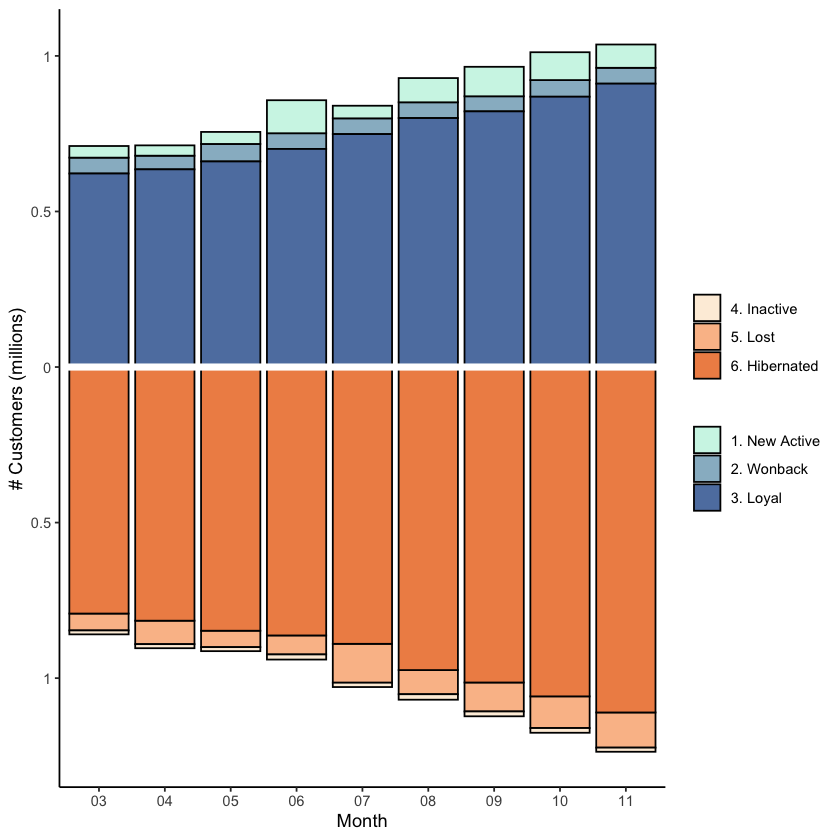

In [143]:
ggplot() +
    geom_bar(data = pic21 %>% filter(GROUP == 'Active'),aes(x = format(DATETIME,"%m"), y = VALUE_/10^6, fill = METRIC), color = 'black', position="stack", stat="identity") + 
    # geom_line(data = df %>% filter(METRIC == 'total_online_users') %>% mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d')), aes(x = format(DATETIME,"%m"), y = VALUE_/10^6, color = 'Total online users', group  =1)) +
    # geom_line(data = df %>% filter(METRIC == 'total_online_active') %>% mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d')), aes(x = format(DATETIME,"%m"), y = VALUE_/10^6, color = 'Total active users', group  =1)) +
    scale_fill_manual(values=seq_gradient_pal("#CFF5E7", "#0D4C92", "Lab")(seq(0,1,length.out=4))) +
    new_scale_fill() +
    geom_bar(data = pic21 %>% filter(GROUP == 'Inactive'),aes(x = format(DATETIME,"%m"), y = -VALUE_/10^6, fill = METRIC), color = 'black', position="stack", stat="identity") + 
    # geom_line(data = df %>% filter(METRIC == 'total_online_inactive') %>% mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d')), aes(x = format(DATETIME,"%m"), y = -VALUE_/10^6, color = 'Total inactive users', group  =1)) +
    scale_fill_manual(values=seq_gradient_pal("#FDEEDC", "#DC5F00", "Lab")(seq(0,1,length.out=4))) +
    new_scale_fill() +
    geom_hline(aes(yintercept = 0), color = 'white', size = 2)+
    scale_y_continuous(labels = abs) + 
    theme_classic() +
    theme(legend.title = element_blank()) +
    labs(x = 'Month', y = '# Customers (millions)')


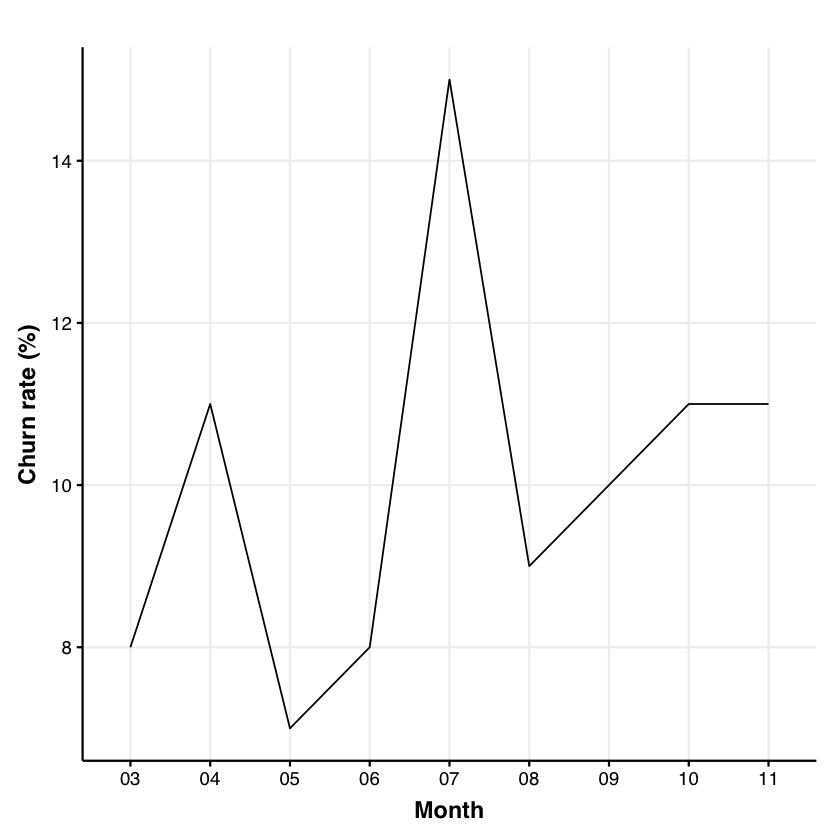

In [154]:
# pic 2: churn rate by month
churn_rate <- df %>% filter(METRIC == 'monthly_churn_rate') %>% mutate(DATETIME = as.Date(DATETIME, '%Y-%m-%d'))
churn_rate %>% ggplot(aes(x = format(DATETIME,"%m"), y = round(VALUE_ * 100), group = 1)) +
geom_line()+
theme_Publication() +
labs(x = 'Month', y = 'Churn rate (%)')

# row 3

In [ ]:
transaction_per_user <- df %>% filter(METRIC == 'transaction_per_user')
transaction_amt_per_user <- df %>% filter(METRIC == 'transaction_amt_per_user')

# row 4

In [4]:
# ggalluvial

pic41 <- read.csv('row4.csv')
pic41 

TYPE_LV1,TYPE_LV2,TYPE_LV3,VALUE
<chr>,<chr>,<chr>,<int>
Active_user,loyal_active_user,nontransactional,220988
New_accquired_user,active_new_accquired_user,nontransactional,45264
Active_user,loyal_active_user,transactional,689848
Inactive_user,hibernated_user,transactional,840
Active_user,wonback_users,nontransactional,34429
New_accquired_user,active_new_accquired_user,transactional,29636
New_accquired_user,inactive_new_accquired_user,transactional,3
Active_user,wonback_users,transactional,16520
Inactive_user,hibernated_user,nontransactional,1109450


In [29]:
table(pic41$TYPE_LV2)


  active_new_accquired_user             hibernated_user 
                          2                           2 
inactive_new_accquired_user                  lost_users 
                          2                           2 
          loyal_active_user               wonback_users 
                          2                           2 

In [5]:
pic41 <- pic41 %>% mutate(TYPE_LV1 = case_when(TYPE_LV1 == 'Active_user' ~ 'Active',
                                    TYPE_LV1 == 'New_accquired_user' ~ 'New',
                                    TYPE_LV1 == 'Inactive_user' ~ 'Inactive'),
                TYPE_LV2 = case_when(TYPE_LV2 == 'loyal_active_user' ~ "Loyal",
                                    TYPE_LV2 == 'active_new_accquired_user' ~ "New Active",
                                    TYPE_LV2 == 'hibernated_user' ~ "Hibernated",
                                    TYPE_LV2 == 'wonback_users' ~ "Wonback",
                                    TYPE_LV2 == 'inactive_new_accquired_user' ~ "New Inactive",
                                    TYPE_LV2 == 'lost_users' ~ "Lost"))

In [59]:
pic41 %>% filter(TYPE_LV2 == 'New Inactive')

TYPE_LV1,TYPE_LV2,TYPE_LV3,VALUE
<chr>,<chr>,<chr>,<int>
New,New Inactive,transactional,3
New,New Inactive,nontransactional,13298


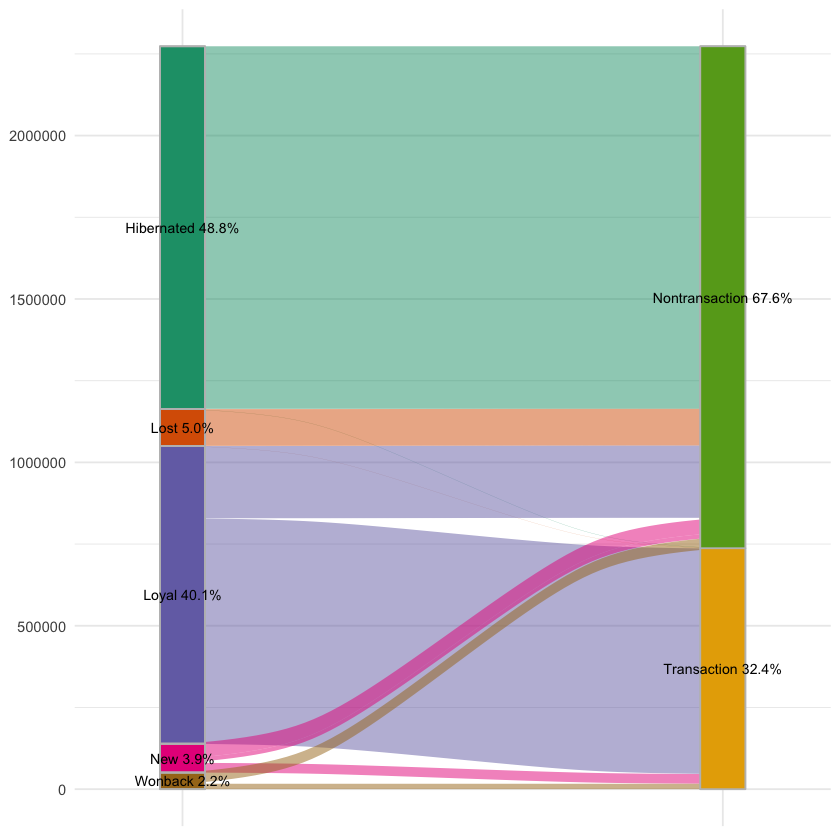

In [163]:
ggplot(pic41 %>% mutate(TYPE_LV2 = case_when(TYPE_LV2 %in% c('New Active','New Inactive') ~ "New", TRUE ~ TYPE_LV2),
                        TYPE_LV3 = case_when(TYPE_LV3 == 'transactional' ~ 'Transaction', TYPE_LV3 == 'nontransactional' ~ 'Nontransaction')),
       aes(y = VALUE, axis1 = TYPE_LV2, axis2 = TYPE_LV3)) +
  geom_alluvium(aes(fill = TYPE_LV2), width = 0) +
  geom_stratum(width = 1/12, aes(fill = TYPE_LV2), color = "grey") +
  geom_stratum(width = 1/12, aes(fill = TYPE_LV3), color = "grey") +
  geom_text(stat = "stratum",
            aes(label = paste(after_stat(stratum),percent(after_stat(prop), accuracy = .1))), size = 3) +
  scale_x_discrete(limits = c("TYPE_LV2", "TYPE_LV3"), expand = c(.1, .1)) +
  scale_fill_brewer(type = "qual", palette = "Dark2") +
  theme_minimal() +
  theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
     #  axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      legend.position="none",
      panel.background=element_blank()
     #  panel.border=element_blank(),
     #  panel.grid.major=element_blank(),
     #  panel.grid.minor=element_blank(),
     #  plot.background=element_blank()
      )


In [ ]:
ggplot(pic41, aes(x = TYPE_LV1, stratum = TYPE_LV2, alluvium = TYPE_LV3, fill = TYPE_LV2)) +
geom_flow